In [1]:
import os
import sys
import math
import numpy as np
import numpy.fft as fft
import matplotlib
import matplotlib.pyplot as plt

In [2]:
Lv = 24
N = 2**Lv

In [3]:
print(N)

16777216


In [4]:
epsilon = np.zeros(N,dtype='float64')

In [5]:
epsilon[:] = 1.

In [6]:
s = np.random.uniform(0,1,10**6)

In [7]:
p = 0.6

print(p)
print(1-p)

0.6
0.4


In [8]:
chg = 0
Nv = 1
epsilon[:] = 1.
for k in range(Nv):
    div = 2**(k+1)
    chk = N//div
    for i in range(div//2):
        rnd = s[chg]
        chg += 1
        if(rnd >= 0.5):
            #print("left")
            epsilon[(2*i+0)*chk:(2*i+1)*chk] *= p
            epsilon[(2*i+1)*chk:(2*i+2)*chk] *= (1-p)
        else:
            #print("right")
            epsilon[(2*i+0)*chk:(2*i+1)*chk] *= (1-p)
            epsilon[(2*i+1)*chk:(2*i+2)*chk] *= p

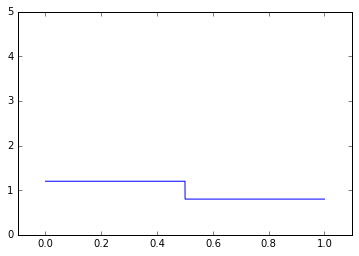

In [9]:
x = np.arange(0,N)
x = x/N
epsAvg = np.average(epsilon)
plt.xlim(-0.1,1.1)
plt.ylim(0,5)
plt.plot(x,epsilon/epsAvg)

In [10]:
chg = 0
Nv = 2
epsilon[:] = 1.
for k in range(Nv):
    div = 2**(k+1)
    chk = N//div
    for i in range(div//2):
        rnd = s[chg]
        chg += 1
        if(rnd >= 0.5):
            #print("left")
            epsilon[(2*i+0)*chk:(2*i+1)*chk] *= p
            epsilon[(2*i+1)*chk:(2*i+2)*chk] *= (1-p)
        else:
            #print("right")
            epsilon[(2*i+0)*chk:(2*i+1)*chk] *= (1-p)
            epsilon[(2*i+1)*chk:(2*i+2)*chk] *= p

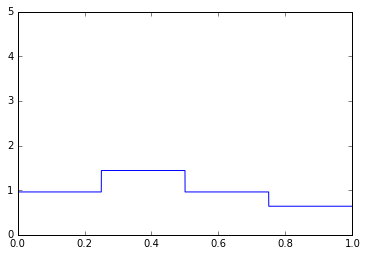

In [11]:
x = np.arange(0,N)
x = x/N
epsAvg = np.average(epsilon)
plt.ylim(0,5)
plt.plot(x,epsilon/epsAvg)

In [12]:
chg = 0
Nv = 9
epsilon[:] = 1.
for k in range(Nv):
    div = 2**(k+1)
    chk = N//div
    for i in range(div//2):
        rnd = s[chg]
        chg += 1
        if(rnd >= 0.5):
            #print("left")
            epsilon[(2*i+0)*chk:(2*i+1)*chk] *= p
            epsilon[(2*i+1)*chk:(2*i+2)*chk] *= (1-p)
        else:
            #print("right")
            epsilon[(2*i+0)*chk:(2*i+1)*chk] *= (1-p)
            epsilon[(2*i+1)*chk:(2*i+2)*chk] *= p

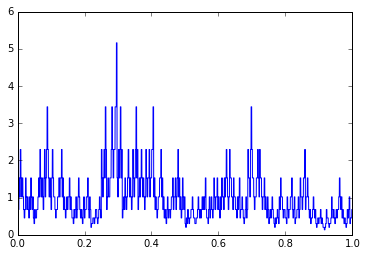

In [13]:
x = np.arange(0,N)
x = x/N
epsAvg = np.average(epsilon)
plt.plot(x,epsilon/epsAvg)

In [14]:
chg = 0
Nv = 13
epsilon[:] = 1.
for k in range(Nv):
    div = 2**(k+1)
    chk = N//div
    for i in range(div//2):
        rnd = s[chg]
        chg += 1
        if(rnd >= 0.5):
            #print("left")
            epsilon[(2*i+0)*chk:(2*i+1)*chk] *= p
            epsilon[(2*i+1)*chk:(2*i+2)*chk] *= (1-p)
        else:
            #print("right")
            epsilon[(2*i+0)*chk:(2*i+1)*chk] *= (1-p)
            epsilon[(2*i+1)*chk:(2*i+2)*chk] *= p

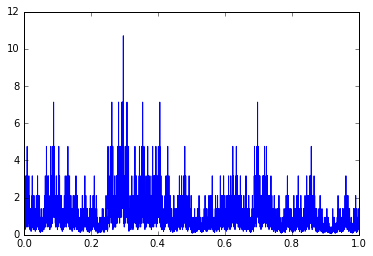

In [15]:
x = np.arange(0,N)
x = x/N
epsAvg = np.average(epsilon)
plt.plot(x,epsilon/epsAvg)

In [16]:
chi = np.zeros(N,dtype='float64')

In [17]:
chi[:] = 0
chi[epsilon > 2*epsAvg] = 1

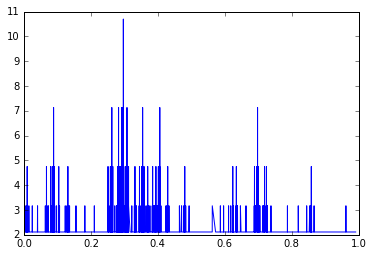

In [18]:

plt.plot(x[epsilon > 2*epsAvg],epsilon[epsilon > 2*epsAvg]/epsAvg)

In [19]:
chi[:] = 0
chi[epsilon > 1*epsAvg] = 1

In [20]:
cchi = fft.rfft(chi)

In [21]:
tmp = cchi*(cchi.conj())

In [22]:
corr = fft.irfft(tmp)

In [23]:
r = np.linspace(0,2*np.pi,N,endpoint=False)

In [24]:
rs = r[r <= np.pi]

In [25]:
c0 = corr[0:1]
c1 = corr[1:N//2]
c2 = corr[(N//2):(N//2+1)]
c3 = corr[(N//2+1):N]

In [27]:
print(c0)
print(c1)
print(c2)
print(c3[::-1])

[ 4874240.]
[ 4873389.  4872538.  4871687. ...,  1056846.  1056820.  1056794.]
[ 1056768.]
[ 4873389.  4872538.  4871687. ...,  1056846.  1056820.  1056794.]


In [28]:
Corr = np.concatenate((c0,c1,c2))

In [30]:
print(Corr)
print(Corr.shape)

[ 4874240.  4873389.  4872538. ...,  1056820.  1056794.  1056768.]
(8388609,)


In [61]:
print(r.shape[0])
print(r.shape[0]//2+1)
print(rs.shape[0])

16777216
8388609
8388609


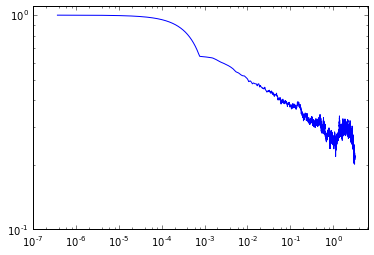

In [32]:
plt.ylim(0.1,1.1)
plt.xlim(10**(-7),2*np.pi)
plt.loglog(rs,Corr/Corr[0],'b')

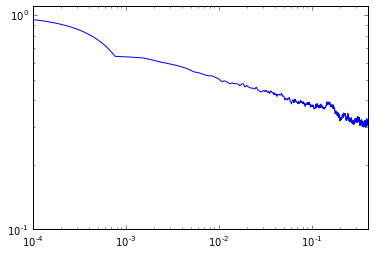

In [36]:
plt.ylim(0.1,1.1)
plt.xlim(0.1*10**(-3),4*10**(-1))
plt.loglog(rs,Corr/Corr[0],'b')

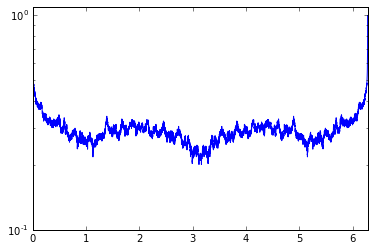

In [35]:
fig = plt.
plt.ylim(0.1,1.1)
plt.xlim(0.0,2*np.pi)
plt.semilogy(r,corr/corr[0],'b')